# Bound energy states for particle in a semi-infinite potential well

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as sci

In [3]:
a = 1e-15
B = ((2*sci.m_e)**0.5)*a/((sci.hbar)) #Taking bound particle to be the mass of an electron and a = 1x10^-15m
B

12799.215119102671

In [4]:
E = np.linspace(0,0.000001,1000000) #Range of energy Values
Tan = np.tan((B*(E**0.5))) #Lhs Function
Tan[:-1][np.diff(Tan)<0] = np.nan #Removing points where tan isn't defined i.e. odd multiple of pi/2 to prevent exta lines
F = -1*((E/(0.000015-E))**0.5) #Rhs Function taking max potential 0.15 V

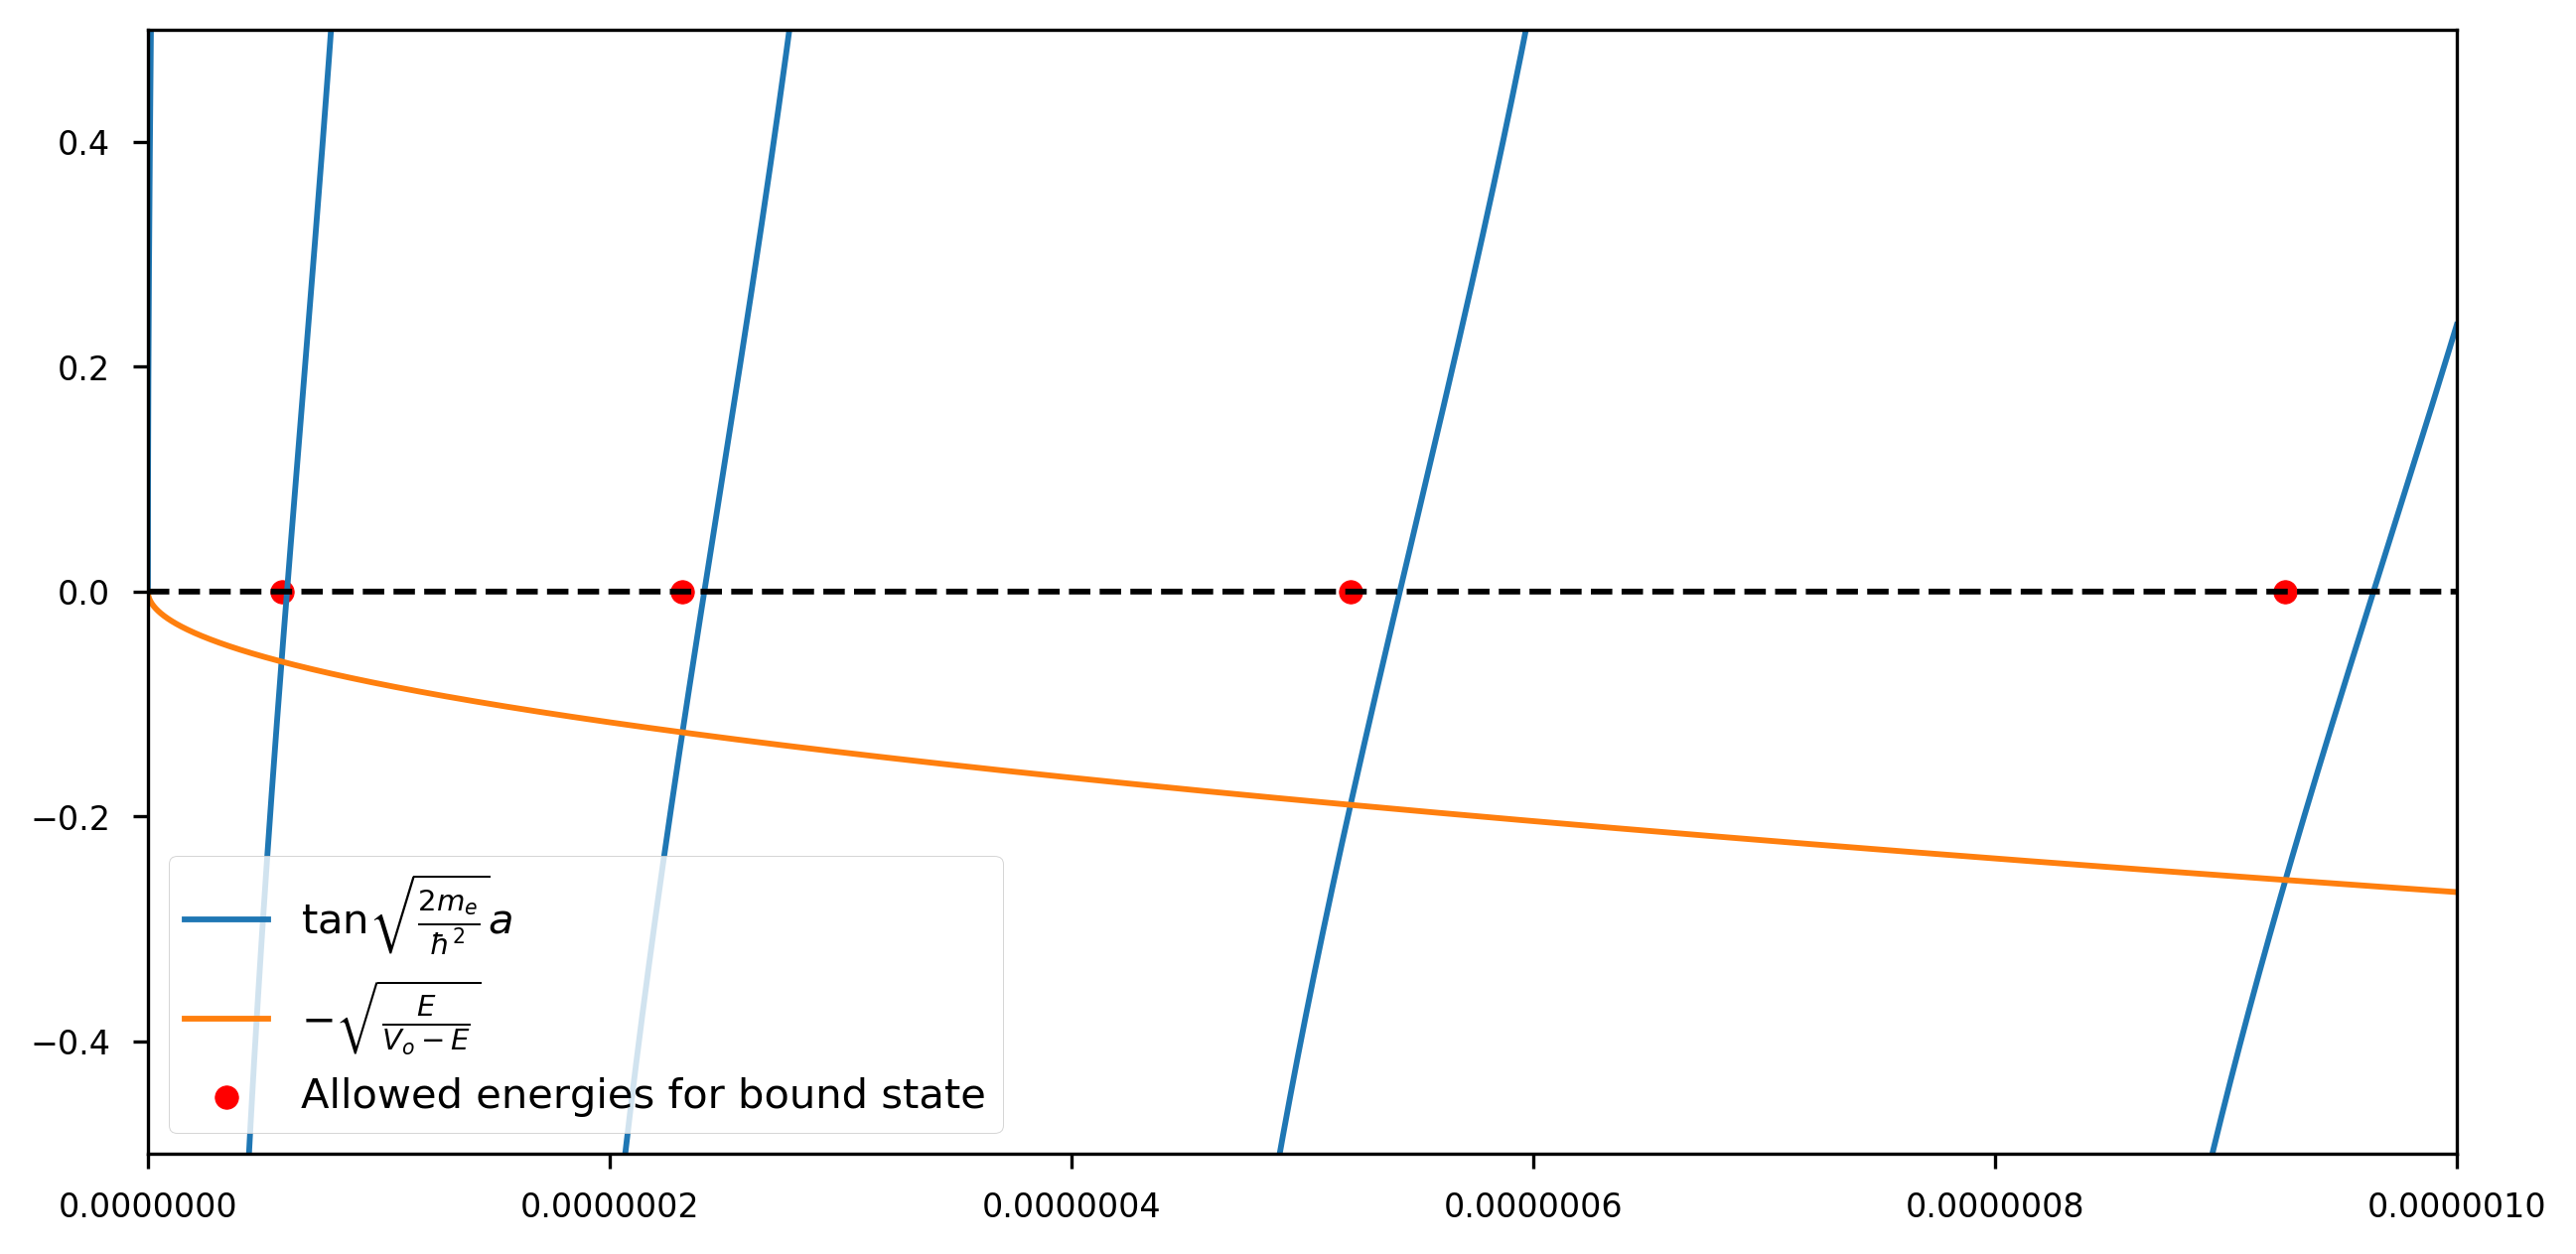

In [7]:
fig, ax = plt.subplots(figsize=(10,5),dpi=300)
plt.style.use('seaborn-paper')
ax.plot(E,Tan,label=r'$\tan{\sqrt{\frac{2m_e}{\hbar^2}}a}$')
ax.plot(E,F,label=r'$-\sqrt{\frac{E}{V_o-E}}$')
ax.scatter([5.79e-8,2.315e-7,5.209e-7,9.258e-7],[0,0,0,0],marker='o',color='r',label='Allowed energies for bound state')
ax.plot(E,E*0,'k--')
ax.set_xlim(0,0.000001)
ax.set_ylim(-0.5,0.5)
ax.legend(loc='lower left',fontsize=10)
plt.savefig('AllowedE.png',dpi=300)

In [8]:
for i in range(1000000): #Finding out allowed energies
    if round((Tan[i]-F[i]),4)==0:
        print(E[i])

0.0
5.7885057885057884e-08
5.788605788605789e-08
5.788705788705789e-08
2.3152323152323151e-07
2.3152423152423152e-07
2.3152523152523152e-07
2.3152623152623152e-07
2.3152723152723153e-07
2.3152823152823153e-07
2.3152923152923153e-07
5.208625208625209e-07
5.208635208635208e-07
5.208645208645209e-07
5.208655208655209e-07
5.208665208665209e-07
5.208675208675209e-07
5.208685208685209e-07
5.208695208695209e-07
5.208705208705209e-07
5.208715208715209e-07
9.258069258069259e-07
9.258079258079258e-07
9.258089258089259e-07
9.258099258099258e-07
9.258109258109259e-07
9.258119258119258e-07
9.258129258129258e-07
9.258139258139258e-07
9.258149258149258e-07
9.258159258159258e-07
9.258169258169258e-07
9.258179258179258e-07
9.258189258189258e-07
9.258199258199258e-07


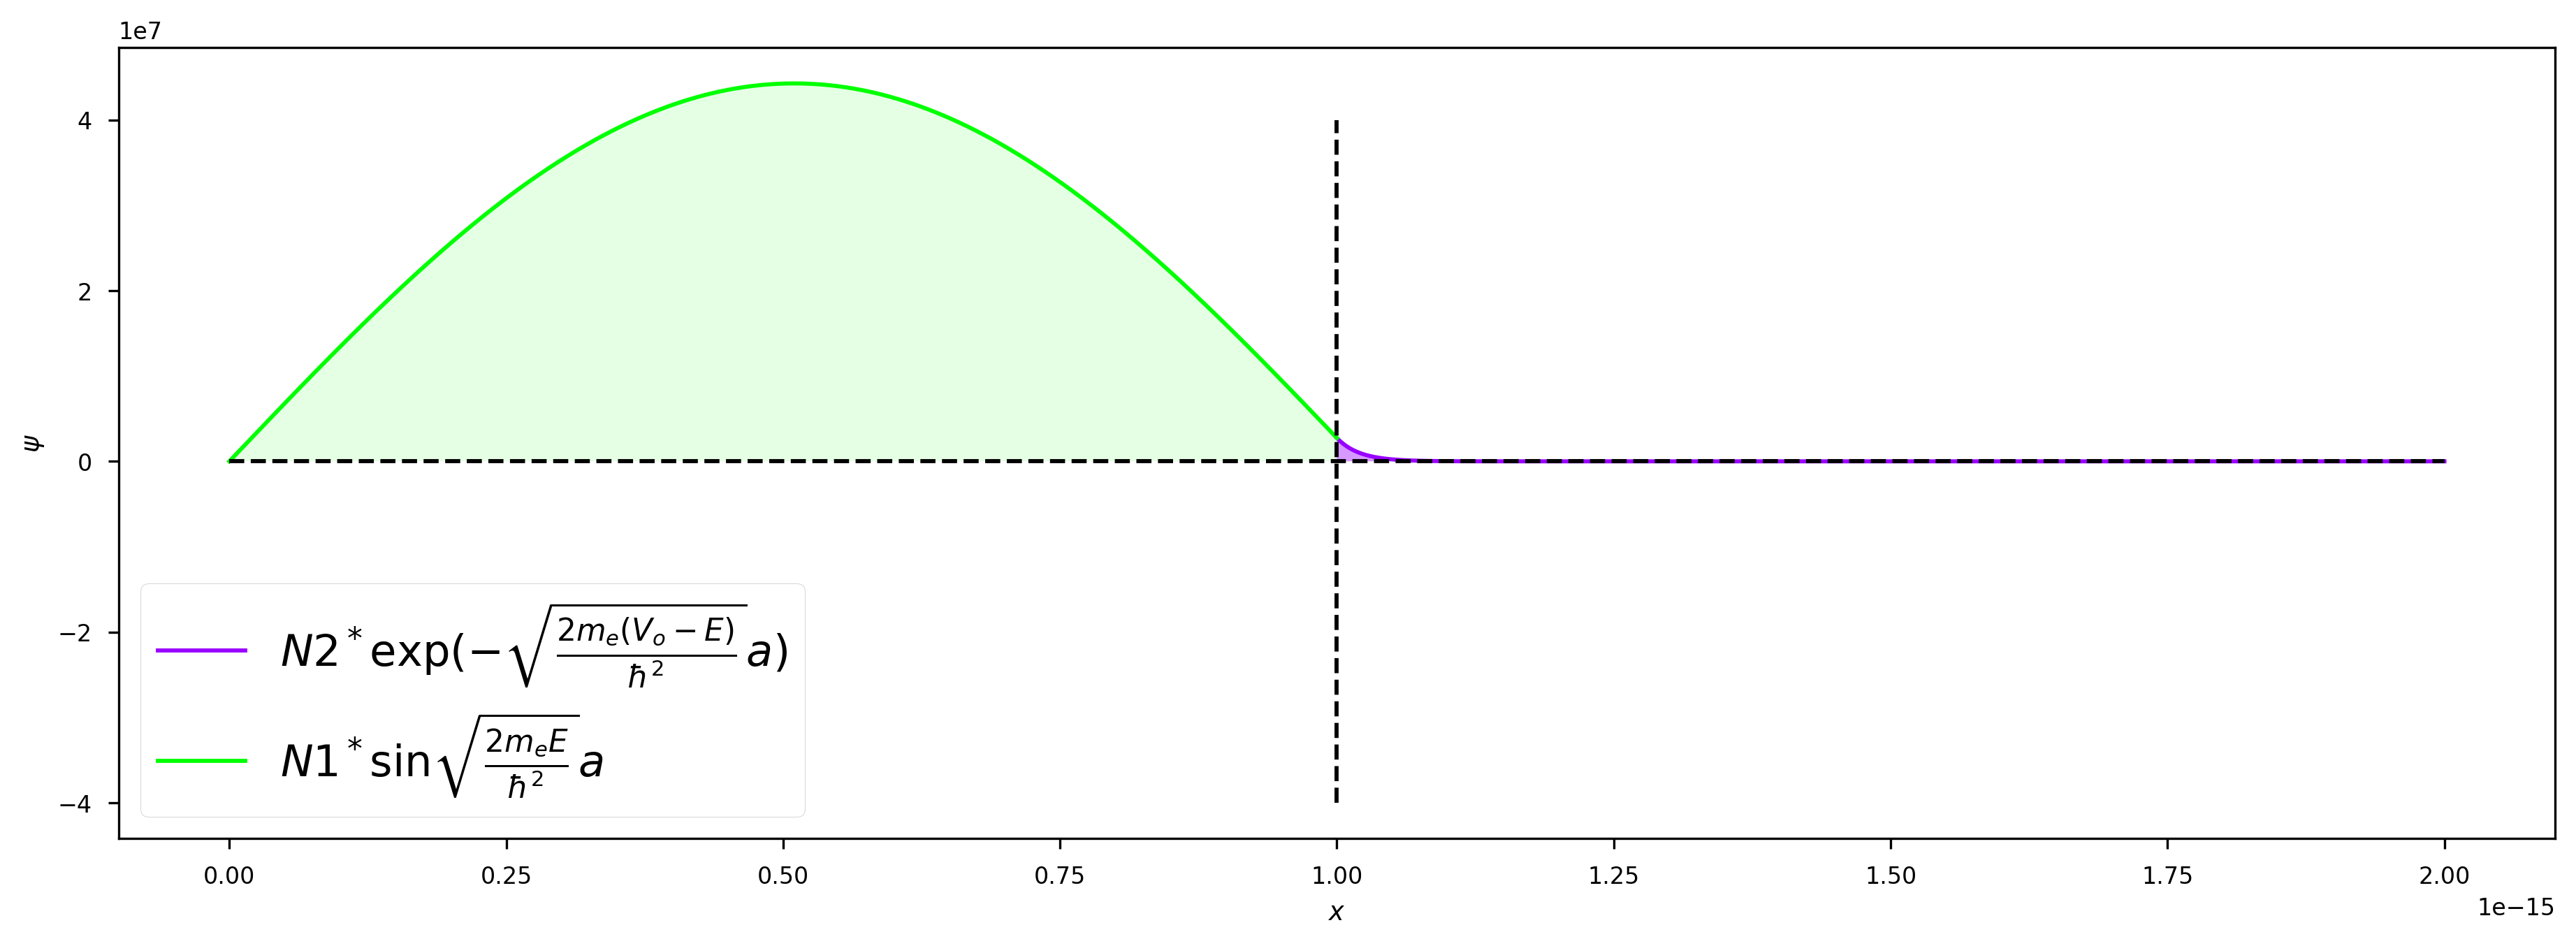

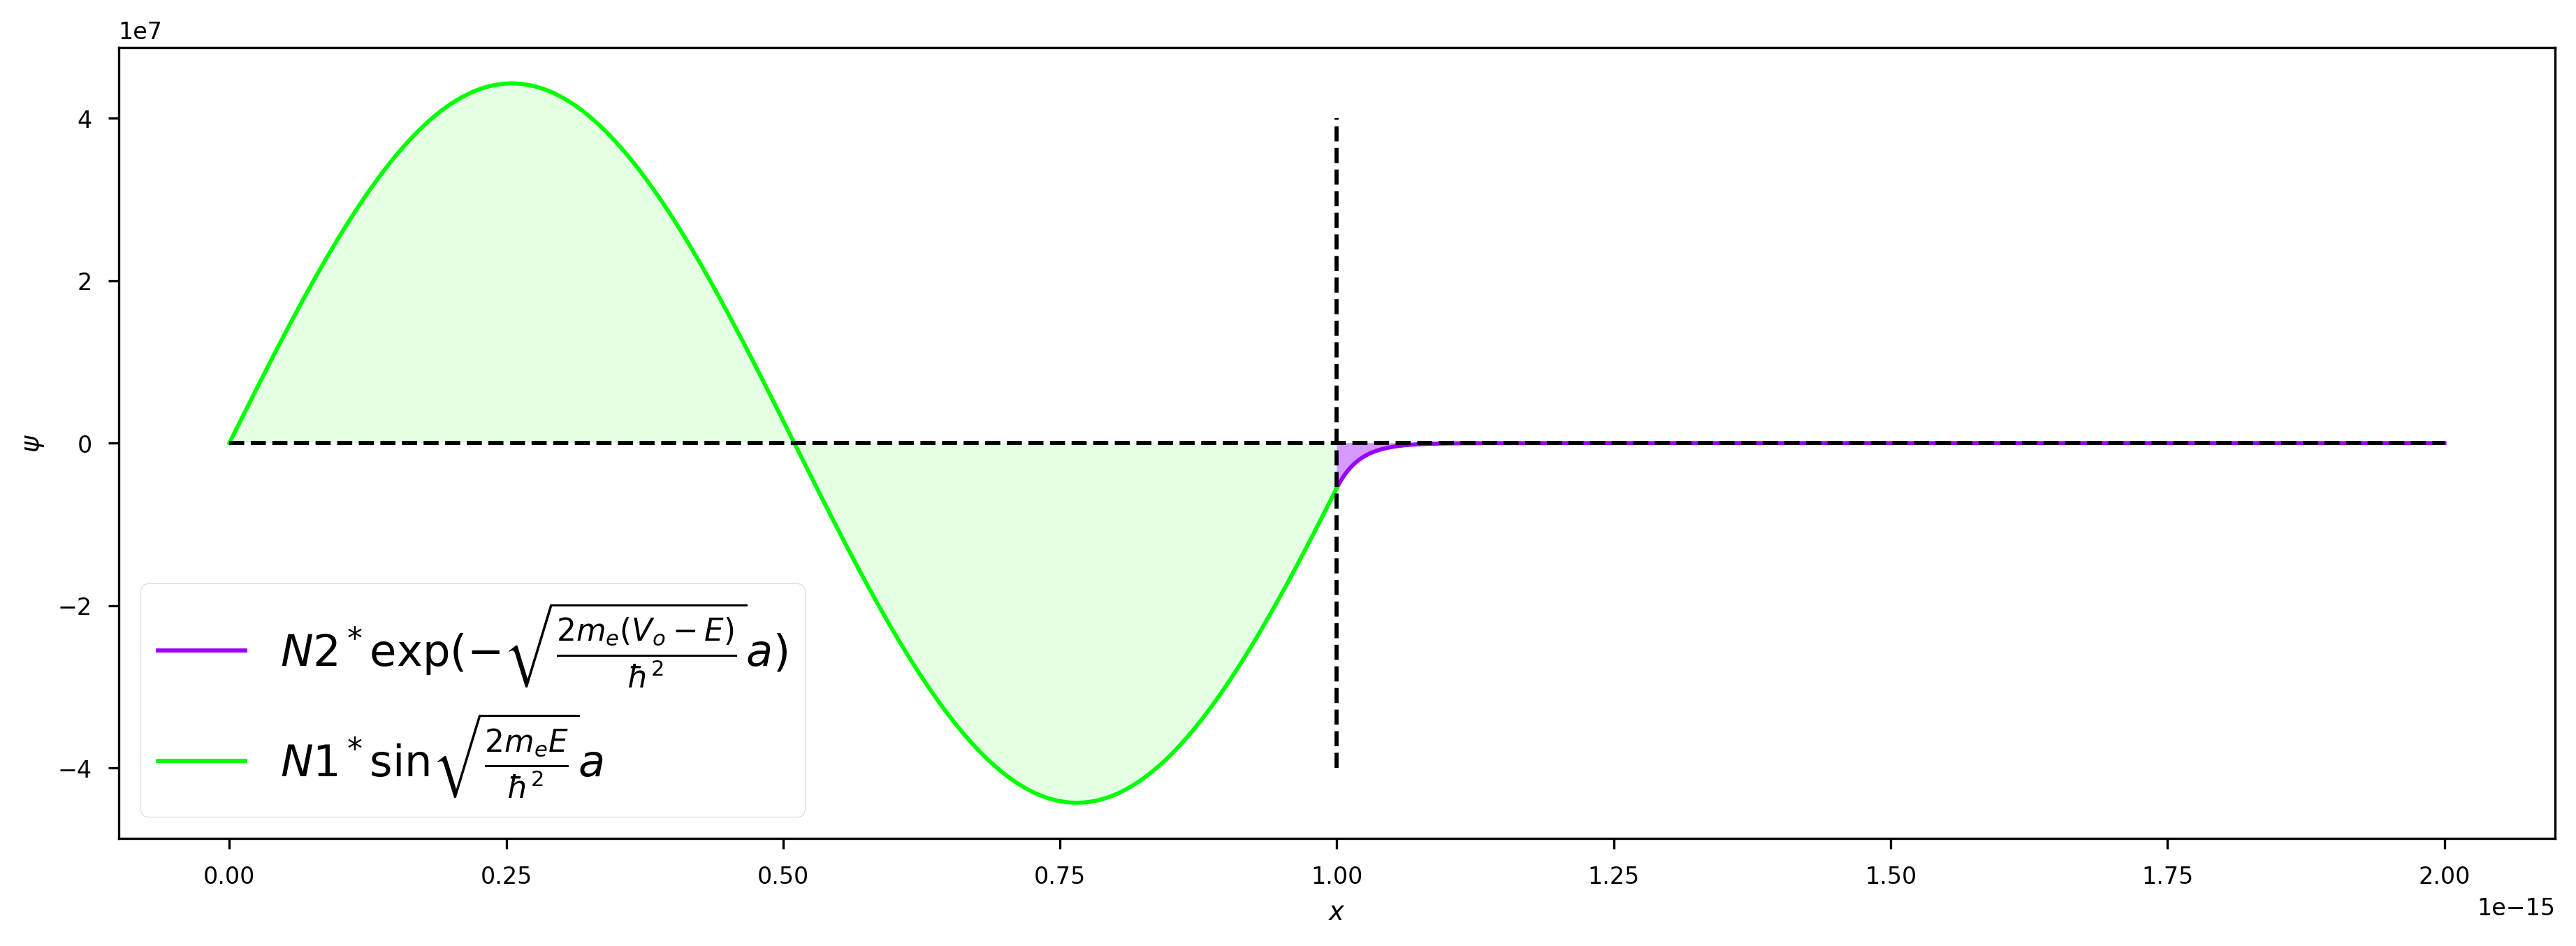

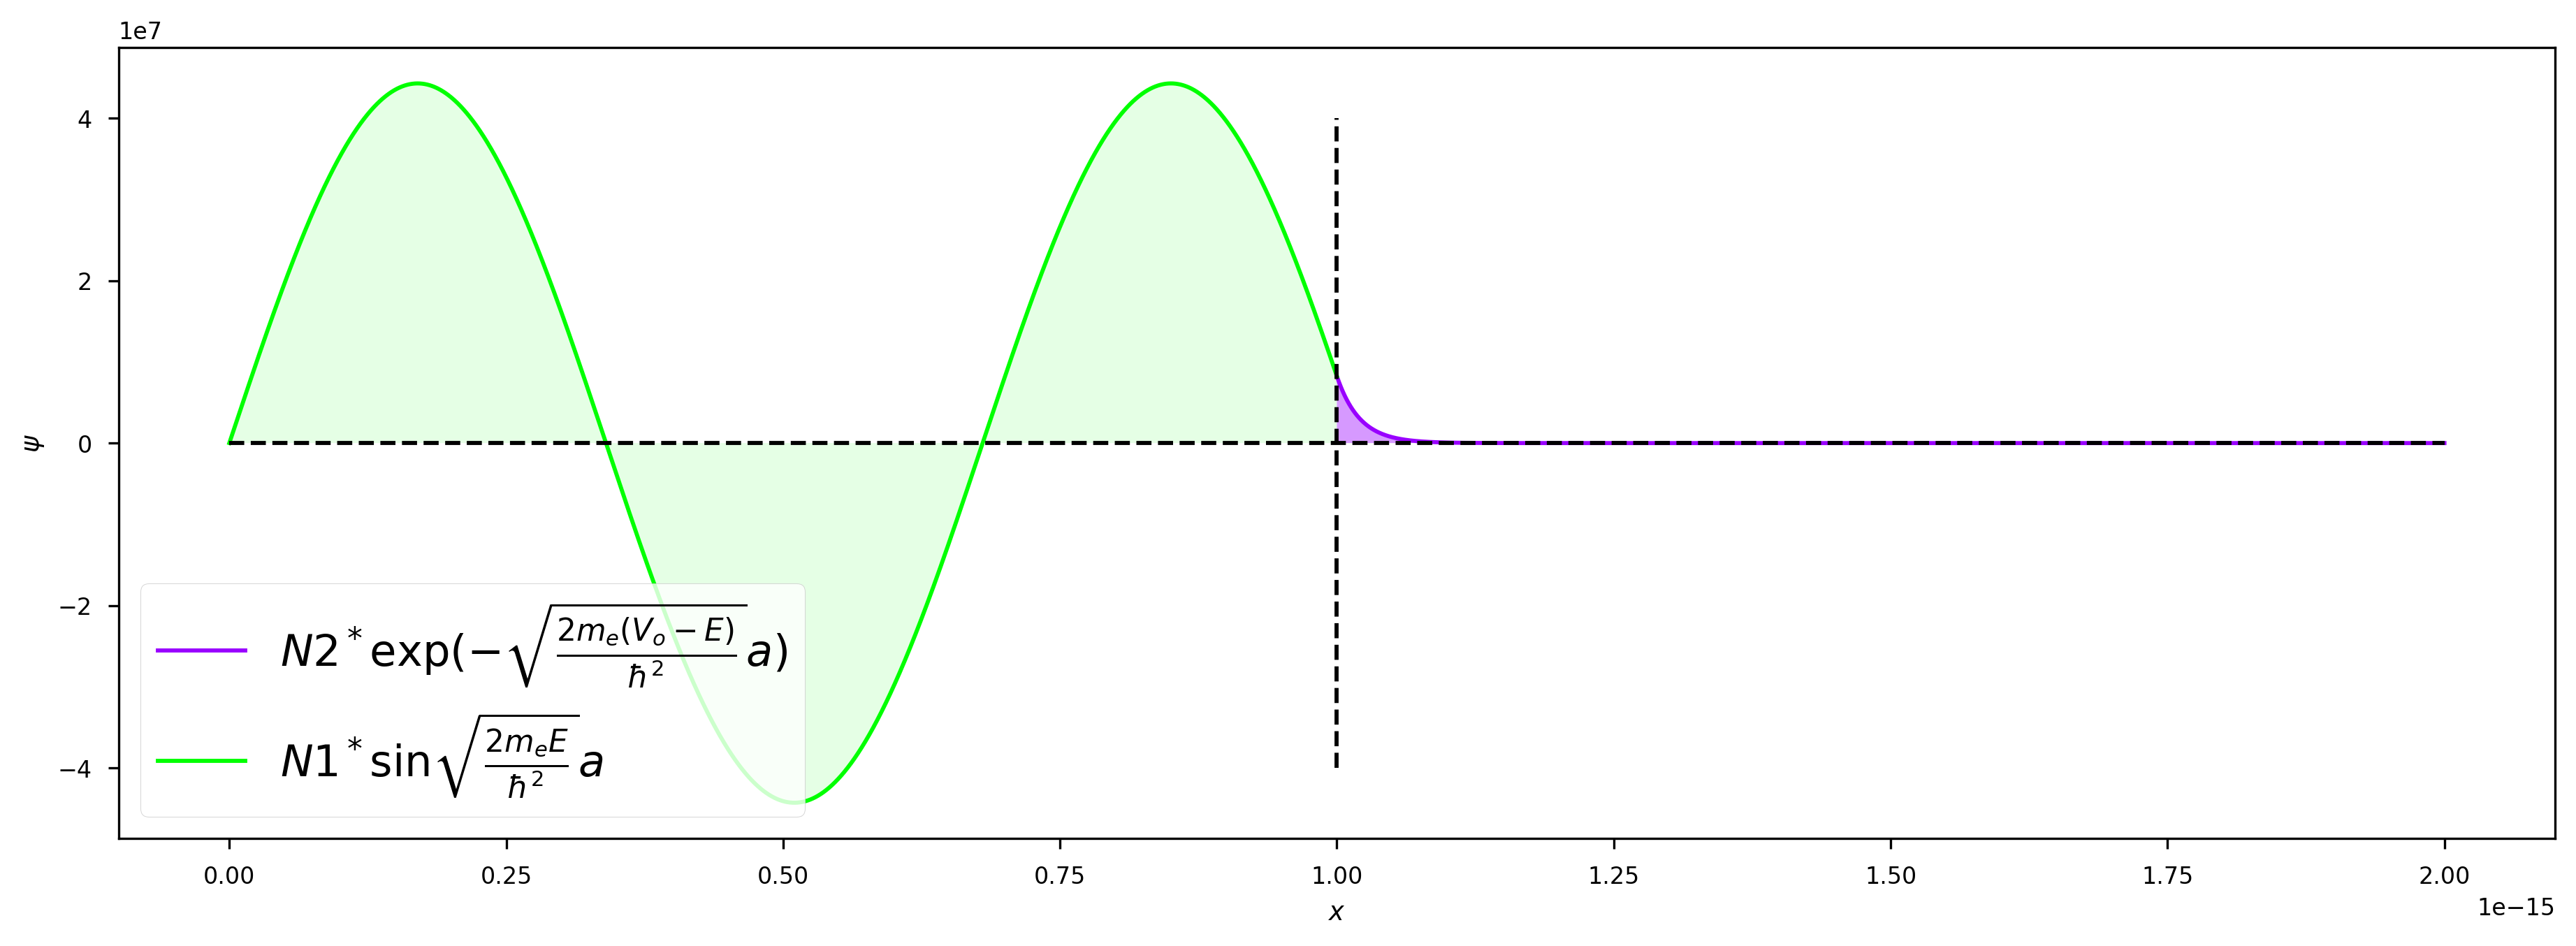

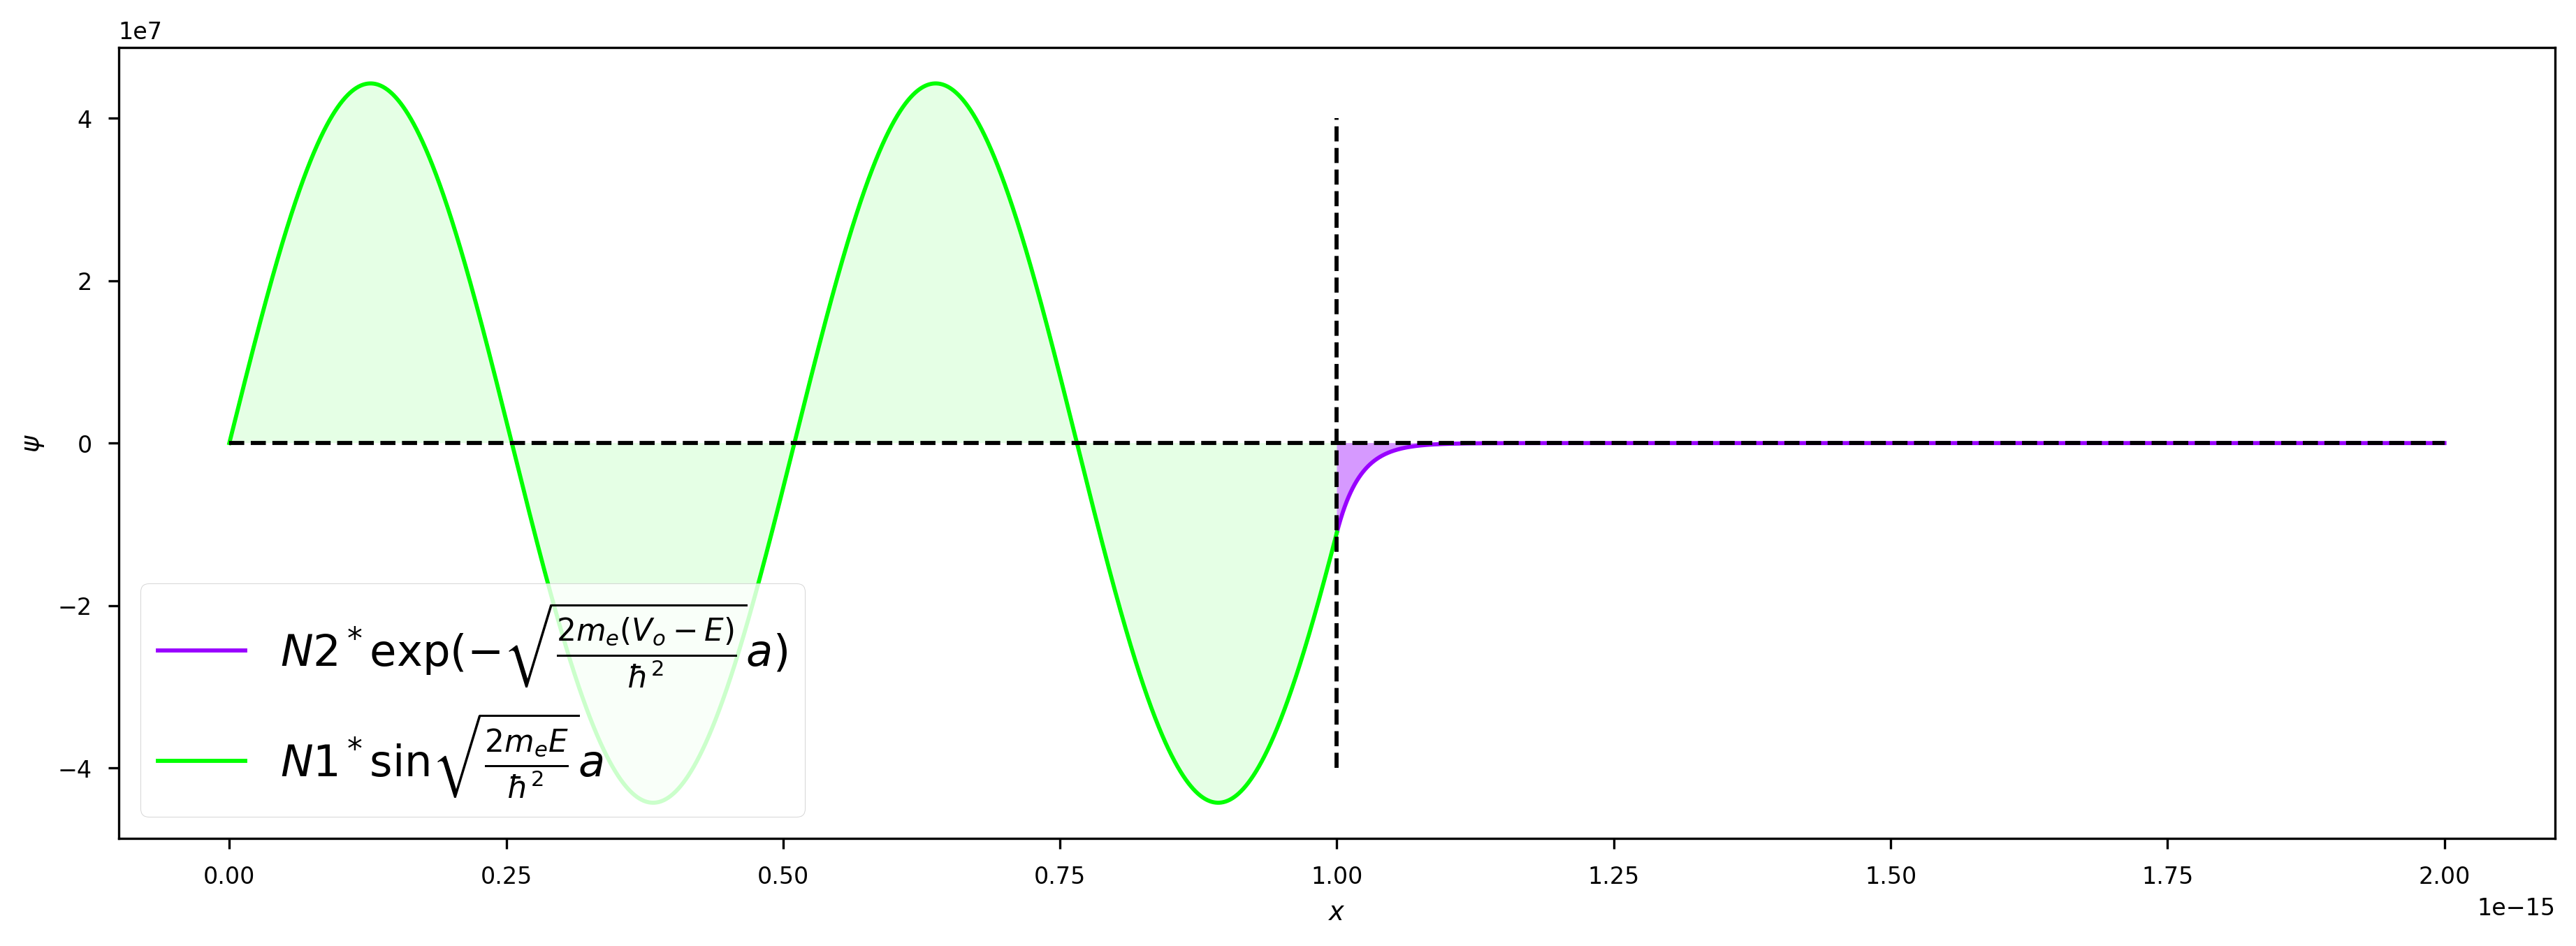

In [10]:
Length1 = np.linspace(1e-15,2e-15,1000000)
Length2 = np.linspace(0,1e-15,1000000)
#Let K represent root(2mE/hbar2) and L represent root(2m(V-E)/hbar2)
AllowedE = [5.79e-8,2.315e-7,5.209e-7,9.258e-7]
i=1
for e in AllowedE:
    #finding Normalization Constant
    K = ((2*sci.m_e*e)**0.5)/sci.hbar
    L = ((2*sci.m_e*(0.000015-e))**0.5)/sci.hbar
    D = 1/(((a/2)-(0.25*(np.sin(2*K*a)/K))+(0.5*((np.sin(K*a)**2)/L)))**0.5)
    def psi1(x):
        return D*np.sin(K*x)
    def psi2(x):
        return (D*np.sin(K*a)*np.exp(L*a))*np.exp((-L*x))
    fig, ax = plt.subplots(figsize=(15,5),dpi=300)
    plt.style.use('seaborn-paper')
    ax.plot(Length1,psi2(Length1),label=r'$N2^*\exp{(-\sqrt{\frac{2m_e(V_o-E)}{\hbar^2}}a)}$',color='#9900FF')
    ax.plot(Length2,psi1(Length2),label=r'$N1^*\sin{\sqrt{\frac{2m_eE}{\hbar^2}}a}$',color='#00FF00')
    ax.plot([0,2e-15],[0,0],'k--')
    ax.plot([1e-15,1e-15],[-4e7,4e7],'k--')
    ax.fill_between(Length1,psi2(Length1),facecolor='#9900FF',alpha=0.40)
    ax.fill_between(Length2,psi1(Length2),facecolor='#00FF00',alpha=0.10)
    ax.legend(loc='lower left',fontsize=15)
    ax.set_ylabel(r'$\psi$')
    ax.set_xlabel(r'$x$')
    plt.savefig('Wavefunction n = '+str(i)+'.png',dpi=300)
    i+=1